## Convolution
- Continuous convolution
  - $(f*g)(t)=\int f(t-\tau)g(t)d\tau$
- Discrete convolution
  - $(f*g)(t)=\sum_{i=-\infty}^\infty f(t-i)g(i)$
- 2D image convolution
  - $(I*K)(i,j)=\sum_m\sum_nI(i-m,i-n)K(m,n)$

### CNN
- convolution layer, pooling layer-> feature extraction fully 
- connected layer-> 분류,회귀 등 decision making



### Stride
- convolution 필터적용시 이동 간격, 필터를 얼마나 dense하게 찍을지
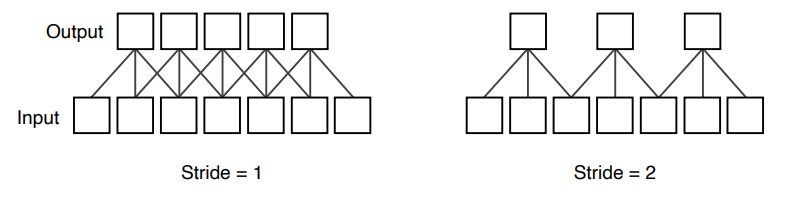

### Padding
- 경계를 덧대는 전처리 방식
- zero padding = 덧대는 숫자가 0인 경우
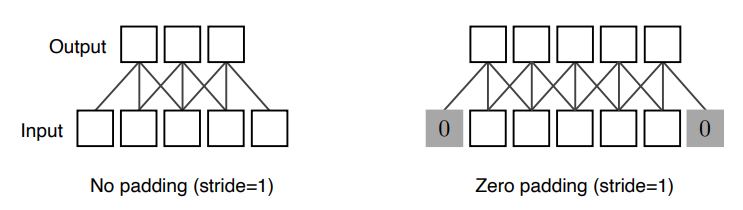

### 모델의 parameter 개수 구하기
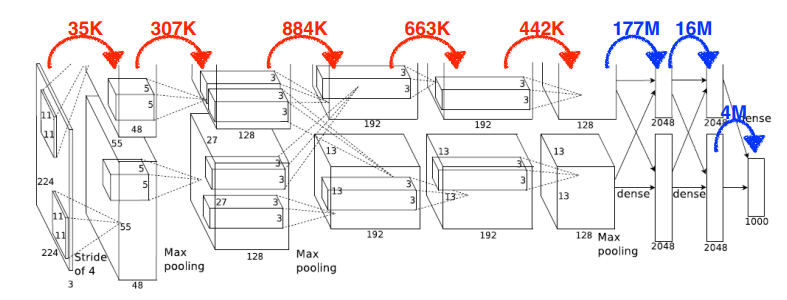
빨강 (convolution layer)
1. 11*11*3*(48*2)=35k
2. 5*5*48*(128*2)=307k
3. 3*3*(128*2)*(192*2)=884k (두개의 layer가 교차되서 x2
4. 3*3*192*(192*2)=663k
5. 3*3*192*(128*2)=442k
파랑 (dense layer)
1. 13*13*(128*2)*(2048*2)=177M
2. (2048*2)*(2048*2)=16M
3. (2048*2)*1000=4M

### 1X1 Convolution
- 차원 줄이기 위해
- parameter 숫자 줄이면서 더 깊이(여러개) 쌓기 위해서

## Modern Convolutional Neural Networks

### ILSVRC (Imagenet Large-Scale Visual Recognition Challenge)
- Classification / Detection / Localization / Segmentation

### Alexnet
- 11x11x3 filters, 5 convolution layers, 3 dense layers
- ReLU 사용: 효과적인 activation 함수
  - linear 모델의 속성 보존
  - optimize 용이
  - good generalization
  - gradient 소실 문제를 극복
- GPU 2개 사용
- Local response normalization(response 몇개 죽임), Overlapping pooling
- 데이터 증강



### VGGNet
- 3x3 convolution filters, 1x1 convolution layers
  - 3x3 convolution을 두번 사용하는게 5x5 convoultion 한번 사용하는 것과 receptive field 차원에서 같음
  - 파라미터 개수: 3x3=294912, 5x5=409600
  - 따라서 3x3 두개 사용하는게 파라미터 개수 줄일 수 있음
- Dropout (p=0.5)
- layer 개수에 따라 VGG16, VGG19


### GoogleNet
- 2014년 ILSVRC 우승
- NiN 구조: 네트워크 안에 네트워크
- Inception blocks
  - convolution 하기 전에 1x1 Conv를 추가해서 parameter 숫자를 줄일 수 있음 (약 30%)
  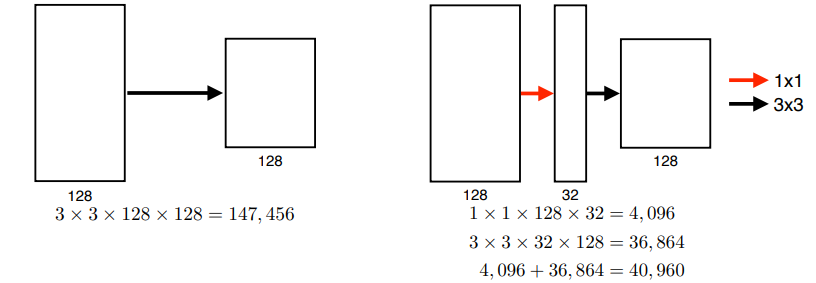

### parameter 개수 비교
1. AlexNet (8-layers): 60M
2. VGGNet (19-layers): (19*3M)=110M
3. GoogleNet (22-layers): 4M

### ResNet
- 깊은 모델이 더 학습하기 힘듦
  - parameter 개수가 과도하면 Overfitting 발생(train 에러 ↓ test 에러 ⇑)
  - 따라서 resnet은 identity map을 추가함: 입력값을 그대로 전달
- nonlinear activation(ReLU) 이후에 추가
- convolution 이후에 batch norm 실행
- bottleneck architecture
  - 3x3 convolution 앞뒤로 1x1 convolution 추가해서 차원을 맞춤


### DenseNet
- addition 대신 concatenation 사용 (파라미터 개수 엄청나게 커짐)
  - Dense block으로 채널을 키우고
  - transition block으로 차원을 줄임 (convolution, pooling)
  

## 요약
- VGG: 3X3 blocks
- GoogleNet: 1x1 convolution으로 채널 수 줄임
- RestNet: skip-connection으로 네트워크 깊게 쌓기
- DenseNet: concatenation (쌓기)